### Que 3.
The SAT-GPA dataset contains information of SAT and GPA scores. We have to predict GPA score on the basis of SAT score by using Linear Regression and Polynomial Regression model. Also evaluate the model by using evaluation metrics.

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv("SAT-GPA.csv")
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [8]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [9]:
df.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [10]:
df.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


<Axes: >

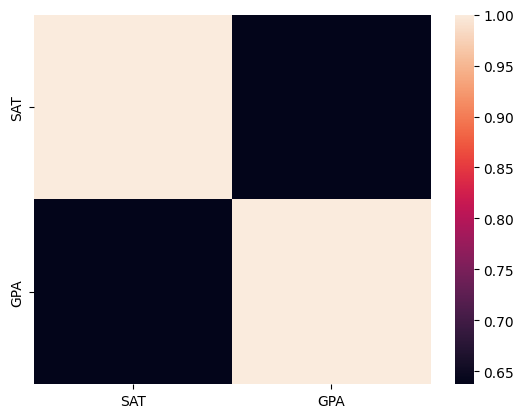

In [11]:
sns.heatmap(df.corr())

### split tha data

In [12]:
x= df.drop(['GPA'],axis=1)

y= df['GPA']

In [13]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test=train_test_split(
    x,y,train_size=0.8,random_state=123456
)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

### model evaluation


#### predict the value 

In [15]:
y_pred = model.predict(x_test)
y_pred

array([3.02844953, 3.34965301, 3.21719796, 2.98043457, 3.2950153 ,
       3.19567402, 3.23375485, 3.58144934, 3.56985952, 3.34634163,
       3.39932365, 3.10957824, 3.56489246, 3.11288962, 3.29832668,
       3.33806319, 3.06487466])

In [29]:
from sklearn.metrics import mean_absolute_error

msa = mean_absolute_error(y_test,y_pred)
msa

0.18427962577280074

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

0.0645374385322576

In [31]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test,y_pred)
rmse

0.2540421983298397

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.35715694821697097

In [21]:
#get the adjusted r2 score
n= len(y_test)
k=2
adjusted_r2_score = 1-((1-np.square(r2)) * ((n-1)/(n-(k+1))))
adjusted_r2_score

np.float64(0.0029269550396116006)

### output visualization

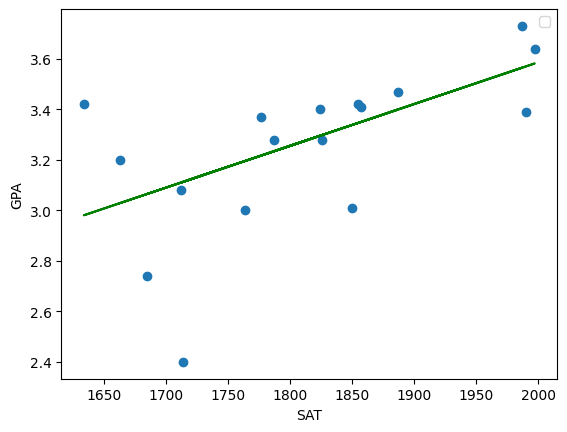

In [ ]:
plt.scatter(x_test,y_test,)
plt.plot(x_test,y_pred,color = 'green')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.legend()